In [1]:
import requests


def get_new_vector():
    url = "https://slot-ml.com"
    api = "/api/v1/users/210daabeab7c9e95665b60b435e2e09c7470afc3/vectors/?random"
    while True:
        response = requests.get(url+api)
        if response.status_code == 200:
            break
    return response


def post_prediction(vec_id, predicted_class):
    url = "https://slot-ml.com"
    api = "/api/v1/users/210daabeab7c9e95665b60b435e2e09c7470afc3/results/"
    response = requests.post(url + api, data={"vector": vec_id, "class": predicted_class})
    return response


resp = post_prediction("27457723e25d71932c9f229ed52cae02", 1)
resp.content

b'{\n\t"error": {\n\t\t"error": {\n\t\t\t"message": "this vector was not sent"\n\t\t},\n\t\t"message": "failed to save class number"\n\t}\n}\n'

In [371]:
from tqdm import tqdm

# data = []
for _ in tqdm(range(400)):
    data.append(get_new_vector().json())
data

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [06:48<00:00,  1.02s/it]


[b'{\n\t"meta1": "REQUEST_ARGS",\n\t"id": "b147cf91e3f220c070f9d7aed65fa6b6",\n\t"meta2": "room-type",\n\t"vector": "5257{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}",\n\t"meta3": 200,\n\t"meta6": "77.221.130.13",\n\t"meta4": 401,\n\t"meta5": "{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}"\n}\n',
 b'{\n\t"meta1": "REQUEST_PATH",\n\t"id": "8965845630b7becb6029dd68f84ca59c",\n\t"meta2": "REQUEST_PATH",\n\t"vector": "\\/mail\\/tll\\/eaotaht.nsf\\/($Inbox)\\/FF02CBCEE47E0DD080258226004EBC1A\\/",\n\t"meta3": 200,\n\t"meta6": "146.255.182.16",\n\t"meta4": 1318,\n\t"meta5": "Mozilla\\/5.0 (iPhone; CPU iPhone OS 10_3_1 like Mac OS X) AppleWebKit\\/603.1.30 (KHTML, like Gecko) Version\\/10.0 Mobile\\/14E304 Safari\\/602.1"\n}\n',
 b'{\n\t"meta1": "REQUEST_JSON",\n\t"id": "8d211f8d38f78e64c5699acf5f6d01b9",\n\t"meta2": "pageY",\n\t"vector": "-98",\n\t"meta3": 200,\n\t"meta6": "62.33.168.30",\n\t"meta4"

In [61]:
json.loads(data[2])

{'meta1': 'REQUEST_JSON',
 'id': '8d211f8d38f78e64c5699acf5f6d01b9',
 'meta2': 'pageY',
 'vector': '-98',
 'meta3': 200,
 'meta6': '62.33.168.30',
 'meta4': 960,
 'meta5': 'Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20100101 Firefox/52.0'}

In [64]:
import pandas as pd
import json

failed = 0
json_data = []
for resp in data:
    try:
        parsed_resp = json.loads(resp)
        json_data.append(parsed_resp)
    except:
        failed += 1
        
print(f"Json failed to parse data {failed} times")
        
df = pd.DataFrame(json_data)
df

Json failed to parse data 3 times


,meta1,id,meta2,vector,meta3,meta6,meta4,meta5
0,REQUEST_ARGS,b147cf91e3f220c070f9d7aed65fa6b6,room-type,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,200,77.221.130.13,401,{${print(chr(49).chr(55).chr(73).chr(53).chr(5...
1,REQUEST_PATH,8965845630b7becb6029dd68f84ca59c,REQUEST_PATH,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,200,146.255.182.16,1318,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...
2,REQUEST_JSON,8d211f8d38f78e64c5699acf5f6d01b9,pageY,-98,200,62.33.168.30,960,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
3,REQUEST_GET_ARGS,eafa80c4d8a7f369a4f04295a8c8b3e2,REQUEST_GET_ARGS._,912013373,404,109.172.30.185,601,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,REQUEST_METHOD\';\'REQUEST_HEADE,ae5aec9a6514b01f11fb3d9f2cf7701f,X-Requested-With\';\'CSRF_TOKEN,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,403,212.33.244.15,1191,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
...,...,...,...,...,...,...,...,...
93,REQUEST_GET_ARGS,d60fb10d2b08503575fbbbca7870f0a0,id,"999999.9 /**/uNiOn/**/aLl /**/sElEcT 1,2,(/**/...",200,2001:4ba0:cafe:ace::1,920,Mozilla/5.0 (Windows; U; Windows NT 5.1; pt-PT...
94,REQUEST_PATH,d13e44347040bf48679b7cf44087244e,,/LO/.svn/dir-prop-base,404,103.208.220.130,397,"Mozilla/5.0 [en] (X11, U; OpenVAS 8.0.9)"
95,CLIENT_USERAGENT,69198c3ea163cce97eb0fc7402b07668,,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,200,212.96.109.112,510,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
96,REQUEST_GET_ARGS,6fb409f29771df7e9a3fb7872b38a04f,REQUEST_GET_ARGS.rid,3578321024,200,46.246.124.91,1196,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [376]:
json_data2 = data[101:]
df = pd.DataFrame(json_data + json_data2)
df

,meta1,id,meta2,vector,meta3,meta6,meta4,meta5
0,REQUEST_ARGS,b147cf91e3f220c070f9d7aed65fa6b6,room-type,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,200,77.221.130.13,401,{${print(chr(49).chr(55).chr(73).chr(53).chr(5...
1,REQUEST_PATH,8965845630b7becb6029dd68f84ca59c,REQUEST_PATH,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,200,146.255.182.16,1318,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...
2,REQUEST_JSON,8d211f8d38f78e64c5699acf5f6d01b9,pageY,-98,200,62.33.168.30,960,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
3,REQUEST_GET_ARGS,eafa80c4d8a7f369a4f04295a8c8b3e2,REQUEST_GET_ARGS._,912013373,404,109.172.30.185,601,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
4,REQUEST_METHOD\';\'REQUEST_HEADE,ae5aec9a6514b01f11fb3d9f2cf7701f,X-Requested-With\';\'CSRF_TOKEN,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,403,212.33.244.15,1191,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...
...,...,...,...,...,...,...,...,...
493,REQUEST_POST_ARGS,50012828c9111a20a4a66edc7016e557,REQUEST_POST_ARGS.rid,3543169957,200,37.46.129.136,691,User-Agent: Mozilla/5.0 (Windows NT 10.0; WOW6...
494,REQUEST_GET_ARGS,eb6cc7fe91e83e26abb634ebb8b92472,backurl,/news/tags/ãîñóäàðñòâåííàÿ áåçîïàñíîñòü/?tags=...,200,5.45.207.38,592,Mozilla/5.0 (compatible; YandexBot/3.0; +http:...
495,REQUEST_HEADERS,146fc6421a8afde13e58e6f1b7953fa4,Referer,file://localhost/mtd_down/widgets/user/nStream...,200,62.227.54.192,563,Mozilla/5.0 (Windows; U; en-US; rv:1.8.1.11; G...
496,REQUEST_ARGS,4aa28433ddcd5cf24b736ae01437a398,m,201404&quot;|ls &quot;-la,200,46.148.48.24,121,&quot;|ls &quot;-la


In [91]:
def predict(json_resp):
    meta5_expected_keywords = ["Mozilla", "Firefox", "Chrome", "Safari"]
    if not any(keyword in json_resp["meta5"] for keyword in meta5_expected_keywords):
        return 2
    return 1


for json_resp in tqdm(json_data[44:]):
    t = post_prediction(json_resp["id"], predict(json_resp))
    assert t.status_code == 200, t.content

  0%|                                                                                           | 0/54 [00:00<?, ?it/s]


AssertionError: b'{\n\t"error": {\n\t\t"error": {\n\t\t\t"message": "class for this vector already stored"\n\t\t},\n\t\t"message": "failed to save class number"\n\t}\n}\n'

### Data analysis

In [5]:
import pandas as pd


df = pd.read_csv("new_data.csv")
df2 = pd.read_csv("third_samples.csv")
df = pd.concat([df, df2], ignore_index=True)
df

,meta1,id,meta2,vector,meta3,meta6,meta4,meta5,sql_keywords_count,c_keywords_count,cluster
0,REQUEST_ARGS,b147cf91e3f220c070f9d7aed65fa6b6,room-type,5257{${print(chr(49).chr(55).chr(73).chr(53).c...,200,77.221.130.13,401,{${print(chr(49).chr(55).chr(73).chr(53).chr(5...,0.2,0.2,0.0
1,REQUEST_PATH,8965845630b7becb6029dd68f84ca59c,REQUEST_PATH,/mail/tll/eaotaht.nsf/($Inbox)/FF02CBCEE47E0DD...,200,146.255.182.16,1318,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...,0.1,0.0,1.0
2,REQUEST_JSON,8d211f8d38f78e64c5699acf5f6d01b9,pageY,-98,200,62.33.168.30,960,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...,0.0,0.0,2.0
3,REQUEST_GET_ARGS,eafa80c4d8a7f369a4f04295a8c8b3e2,REQUEST_GET_ARGS._,912013373,404,109.172.30.185,601,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.0,0.0,2.0
4,REQUEST_METHOD\';\'REQUEST_HEADE,ae5aec9a6514b01f11fb3d9f2cf7701f,X-Requested-With\';\'CSRF_TOKEN,POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42c...,403,212.33.244.15,1191,Mozilla/5.0 (Windows NT 5.1; rv:52.0) Gecko/20...,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
693,REQUEST_METHOD\';\'REQUEST_CONTE,ec4a24048eb8f1bdba7cb2062ffff4b3,NaN,POST\';\'multipart/form-data; boundary=98e8b8d...,200,146.185.223.154,1697,Mozilla/5.0 (Windows NT 8.1; Win64; rv:31.0) G...,NaN,NaN,NaN
694,REQUEST_ARGS,ea94bc4dd2d48ad18684c86aa80fdac7,action,verificationcode;vid=register;rand=8e0f1668400...,200,93.188.37.233,473,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,NaN,NaN,NaN
695,REQUEST_METHOD\';\'REQUEST_CONTE,603751f9980a0a0338e077ee4c395a55,NaN,POST\';\'multipart/form-data; boundary=c351d1c...,200,146.185.223.254,1731,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,NaN,NaN,NaN
696,REQUEST_POST_ARGS,142018495616eb5570ffde236d6da81b,reference to,http://unw5vk6s.b.wlrm.tl/a.dtd,302,139.162.174.26,404,Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7....,NaN,NaN,NaN


In [67]:
sql_keywords = ['ADD', 'EXTERNAL',  'PROCEDURE', 'ALL', 'FETCH', 'PUBLIC', 'ALTER', 'FILE', 'RAISERROR', 'AND', 'FILLFACTOR', 'READ', 'ANY', 'FOR', 'READTEXT', 'AS', 'FOREIGN', 'RECONFIGURE', 'ASC', 'FREETEXT', 'REFERENCES', 'AUTHORIZATION', 'FREETEXTTABLE', 'REPLICATION', 'BACKUP', 'FROM', 'RESTORE', 'BEGIN', 'FULL', 'RESTRICT', 'BETWEEN', 'FUNCTION', 'RETURN', 'BREAK', 'GOTO', 'REVERT', 'BROWSE', 'GRANT', 'REVOKE', 'BULK', 'GROUP', 'RIGHT', 'BY', 'HAVING', 'ROLLBACK', 'CASCADE', 'HOLDLOCK', 'ROWCOUNT', 'CASE', 'IDENTITY', 'ROWGUIDCOL', 'CHECK', 'IDENTITY_INSERT', 'RULE', 'CHECKPOINT', 'IDENTITYCOL', 'SAVE', 'CLOSE', 'IF', 'SCHEMA', 'CLUSTERED', 'IN', 'SECURITYAUDIT', 'COALESCE', 'INDEX', 'SELECT', 'COLLATE', 'INNER', 'SEMANTICKEYPHRASETABLE', 'COLUMN', 'INSERT', 'COMMIT', 'INTERSECT', 'COMPUTE', 'INTO', 'SESSION_USER', 'CONSTRAINT', 'IS', 'SET', 'CONTAINS', 'JOIN', 'SETUSER', 'CONTAINSTABLE', 'KEY', 'SHUTDOWN', 'CONTINUE', 'KILL', 'SOME', 'CONVERT', 'LEFT', 'STATISTICS', 'CREATE', 'LIKE', 'SYSTEM_USER', 'CROSS', 'LINENO', 'TABLE', 'CURRENT', 'LOAD', 'TABLESAMPLE', 'CURRENT_DATE', 'MERGE', 'TEXTSIZE', 'CURRENT_TIME', 'NATIONAL', 'THEN', 'CURRENT_TIMESTAMP', 'NOCHECK', 'TO', 'CURRENT_USER', 'NONCLUSTERED', 'TOP', 'CURSOR', 'NOT', 'TRAN', 'DATABASE', 'NULL', 'TRANSACTION', 'DBCC', 'NULLIF', 'TRIGGER', 'DEALLOCATE', 'OF', 'TRUNCATE', 'DECLARE', 'OFF', 'TRY_CONVERT', 'DEFAULT', 'OFFSETS', 'TSEQUAL', 'DELETE', 'ON', 'UNION', 'DENY', 'OPEN', 'UNIQUE', 'DESC', 'OPENDATASOURCE', 'UNPIVOT', 'DISK', 'OPENQUERY', 'UPDATE', 'DISTINCT', 'OPENROWSET', 'UPDATETEXT', 'DISTRIBUTED', 'OPENXML', 'USE', 'DOUBLE', 'OPTION', 'USER', 'DROP', 'OR', 'VALUES', 'DUMP', 'ORDER', 'VARYING', 'ELSE', 'OUTER', 'VIEW', 'END', 'OVER', 'WAITFOR', 'ERRLVL', 'PERCENT', 'WHEN', 'ESCAPE', 'PIVOT', 'WHERE', 'EXCEPT', 'PLAN', 'WHILE', 'EXEC', 'PRECISION', 'WITH', 'EXECUTE', 'PRIMARY', 'WITHIN GROUP', 'EXISTS', 'PRINT', 'WRITETEXT','EXIT', 'PROC']
sql_keywords = [keyword.lower() for keyword in sql_keywords]
code_keywords = ['print', 'chr', 'auto', 'break', 'case', 'char', 'const', 'continue', 'default', 'do', 'double', 'else', 'enum', 'extern', 'float', 'for', 'goto', 'if', 'int', 'long', 'register', 'return', 'short', 'signed', 'sizeof', 'static', 'struct', 'switch', 'typedef', 'union', 'unsigned', 'void', 'volatile', 'while']
bash_keywords = ["ls", "pwd", "mkdir"]

corpus = (
    df["vector"].str.lower()
    .str.replace("\/\*\*\/", " ", regex=True)
    # .str.replace('[%[0-9a-z]{2}]+', " <bin> ", regex=True)
    .str.replace("(http:\/\/|https:\/\/)?[a-zA-Z\/\_\.0-9]+\.(com|ru|info|io|tl|php|js)(\/[a-zA-Z\/\_\.0-9]+)*", " <link> ", regex=True)
    
    # NEW PATTERN
    .str.replace("(([a-zA-Z]+\:)?)((\/+|\.+)?)(\/+(([a-zA-Z0-9\_\%\-]+)|(\.+)))+(\.([a-zA-Z0-9\_\%\-]+)+)?", " <path> ", regex=True)
    
    # OLD PATTERN
    #.str.replace("(\/)?((\/[a-zA-Z])+)+", " <path> ", regex=True)
    
    .str.replace(r'[$\?\\\'\{\}\(\)\.\;\,\+\=\"]', ' ', regex=True)
    .str.replace(f"(^| )({'|'.join(sql_keywords)})($| )", " <sql> ", regex=True)
    .str.replace('(^| )[-]?[0-9]+((\,|\.)[0-9]+)?($| )', " <num> ", regex=True)
    .str.replace('(0x)[0-9]+(e)?[0-9]+', " <num> ", regex=True)
    .str.replace(f"(^| )({'|'.join(code_keywords)})($| )", " <code> ", regex=True)
    .str.replace(f"(^| )({'|'.join(bash_keywords)})($| )", " <bash> ", regex=True)

).values
#print(corpus[16][:100])
#print(df.iloc[16]["vector"])
#for i, t in enumerate(corpus[:100]):
#    print(f"{i}: {t}")
print(corpus[51])
df.loc[51]["vector"]

 <link>    <sql> all  <sql>  <num>   <num>   <num>   <num>   <num>   <num>   <num>  <sql>  <num>   <num> 


'/blog/index.php/2013/08/07/999999.9"+/**/uNiOn/**/aLl+/**/sElEcT+0x393133353134353632312e39,0x393133353134353632322e39,0x393133353134353632332e39,0x393133353134353632342e39,0x393133353134353632352e39,0x393133353134353632362e39,0x393133353134353632372e39+and+"0"="0'

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np


vectorizer = TfidfVectorizer(max_features=50)
vectorizer = vectorizer.fit(corpus)

X = vectorizer.transform(corpus)#.toarray()
X = np.hstack([
    X.toarray(),
    (((df["meta3"] // 100) - 2) / 5).values.reshape(-1, 1)
])
pca = PCA(n_components=2)
x = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.29953492 0.18348962]
[12.05714701  9.43683967]


cluster
0    198
1    500
Name: vector, dtype: int64


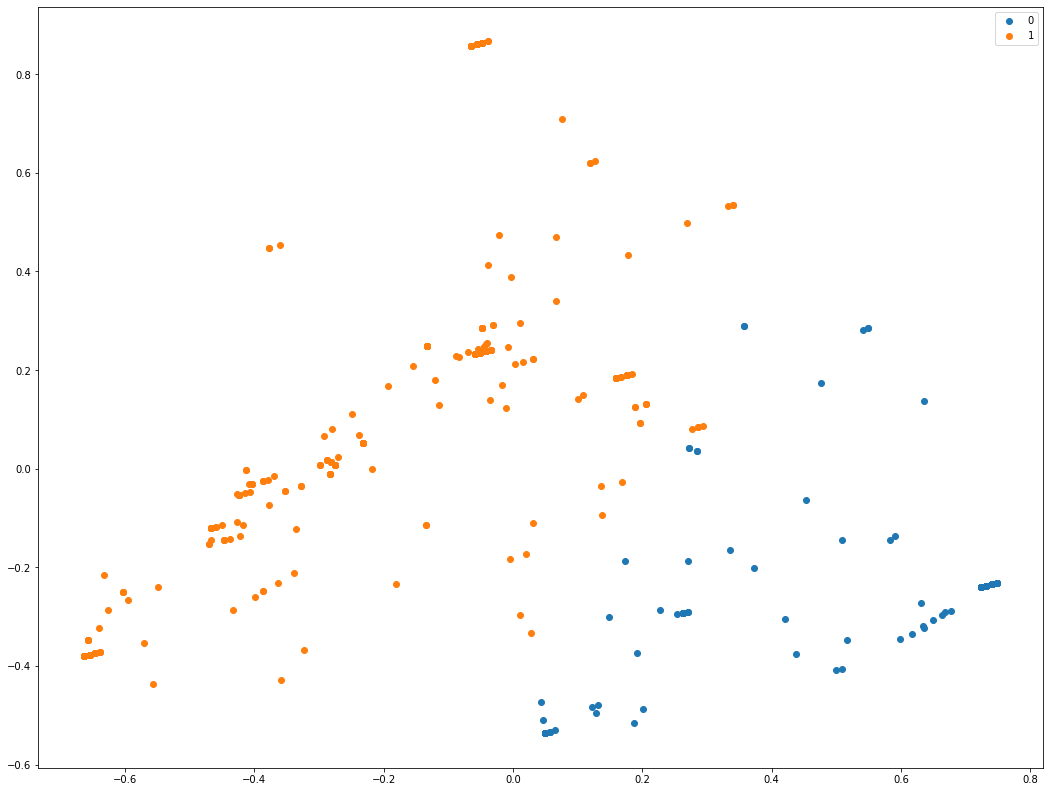

In [74]:
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

clustering = KMeans(2,random_state=1024).fit(X)
f, ax = plt.subplots(figsize=(18, 14))
points = pd.DataFrame({"x1": x.T[0], "x2": x.T[1], "cluster": clustering.labels_})
for c, d in points.groupby("cluster"):
    ax.scatter(d["x1"], d["x2"], label=c)
ax.legend()

df["cluster"] = clustering.labels_
print(df.groupby("cluster")["vector"].count())
df["text"] = corpus
plt.show()

In [76]:
for t, d in df.query("cluster == 1")[["text", "vector"]].iterrows():
    print(t)
    print("corpus: ", d.text)
    print()
    print("orig: ", d.vector)
    print()
    #print()

0
corpus:   <num>   <sql> <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>  <code> <num>    

orig:  5257{${print(chr(49).chr(55).chr(73).chr(53).chr(51).chr(48).chr(86).chr(65).chr(117).chr(52))}}

2
corpus:   <num> 

orig:  -98

3
corpus:   <num> 

orig:  912013373

4
corpus:  post     xmlhttprequest     14f2e70b072e12f42ca4421570deb577812ff61eacd5da8de266337010fd64447645eb039a4aaaa5

orig:  POST\';\'XMLHttpRequest\';\'14f2e70b072e12f42ca4421570deb577812ff61eacd5da8de266337010fd64447645eb039a4aaaa5

8
corpus:   <num> 

orig:  311464954

9
corpus:  wqt_3qlnbvbctqmaaama1gafaqirm8ztbrdhz4esqejfxh0yrnsau86qwqkskjyjcd0k16nwzt8rct0k16nwzt8zaaaagd0kieahcq0sbclxdqnimqaaagbmzuy_mnit2we4majamrrialcsn_umwimyggaaakgxohin1qsaaqgkaqnvu0ssbqbwxpgbrakgadgeqaebsaeauaebwaefyaec0aea2aea4aea8aea-gejtvnoulvsvtexigi7dwyoj2enlcaymtc0mduzlcaxnte3ndg5ntc5ktt1zigncicsidgxnjeynze2nh4a8iesavubiuxqtuz2d2lfzzrvskvlewy5u1lzqundsnnoz3dbrgdb

corpus:    1511a8409a7a13eb4e550411ad8e4c197c531d2fe6d71f74a23293d9b870baea7236f53abb40624b13324de1eeb3a698      

orig:  \"1511a8409a7a13eb4e550411ad8e4c197c531d2fe6d71f74a23293d9b870baea7236f53abb40624b13324de1eeb3a698\"\"\"

362
corpus:  ½ ×í  z  àtìã#w  s¸æ ¸:ÿ

orig:  ½?×í?,Z??ÀTìÃ#w)?s¸Æ(¸:ÿ

363
corpus:  post     multipart <path>   boundary 09662a5b324d8     

orig:  POST\';\'multipart/form-data; boundary=09662a5b324d8\';\'

365
corpus:   <num> 70    

orig:  2.70\"\"

366
corpus:  qwertyuiop

orig:  qwertyuiop

367
corpus:  emailuser sa email msg <num> 

orig:  emailuser;sa=email;msg=101929

368
corpus:   <num> 

orig:  709652205

370
corpus:  <div class  gogad1 >
<!-- vita-mobile-1 -->
<ins class  adsbygoogle 
     style  display:block 
     data-ad-client  ca-pub-6155895742915600 
     data-ad-slot  <num> 
     data-ad-format  <code> >< <path> >
<script>
 adsbygoogle   window adsbygoogle || []  push     
< <path> >
< <path> >

orig:  <div class="gogad1">
<!-- vita-m

update sc_product_options_values <sql> variantid <sql>  option_type  <num>  <sql> optionid  <num>  <sql> productid  <num> 

orig:  
--boundaryemae
Content-Disposition: form-data; name="data"; filename="C:\Users\NataliaAkhmedova\AppData\Local\Temp\23\v8_B1DB_1c2da.was"
Content-Type: application/x-zip-compressed


UPDATE SC_product_options_values SET variantID=NULL ,option_type='1' WHERE optionID='14' AND productID='3085'

616
corpus:   <link>  au <path> 

orig:  http://www.tsvtaxi.com.au/buy-levlen-ed-online-australia.pdf

617
corpus:   <link> -on-important-of-clean-and-green-environment-page1   

orig:  http://www.studymode.com/.../essay-on-important-of-clean-and-green-environment-page1...

618
corpus:   <num> 

orig:  1516542980370

619
corpus:  you have an error <sql> your sql syntax  <sql> the manual that corresponds <sql> your mysql server version <sql> the <sql> syntax <sql> use near     <sql> all  <sql>  <num>   <num>   at line <num> 

orig:  You have an error in your SQL syntax;

cluster
-1      41
 0      33
 1     132
 2       8
 3     110
 4      13
 5      56
 6      39
 7      25
 8       8
 9       8
 10      7
 11      5
 12      8
 13      7
Name: x1, dtype: int64


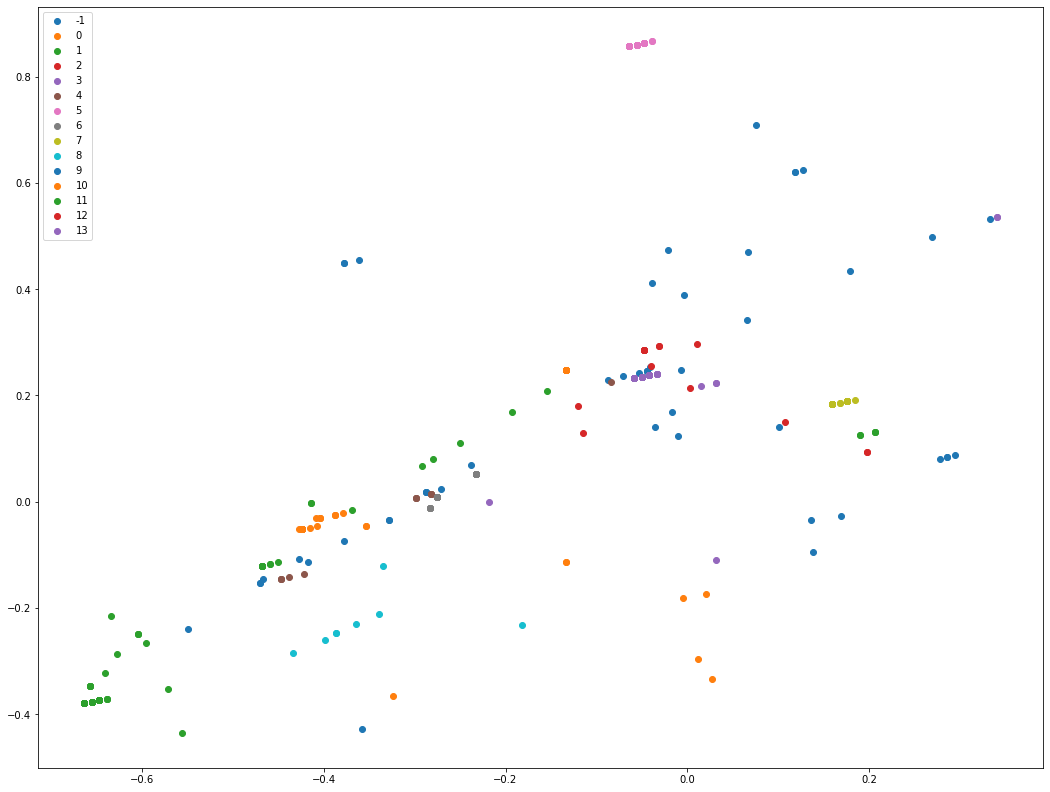

In [78]:
clustering2 = DBSCAN().fit(X[df["cluster"] == 1])

f, ax = plt.subplots(figsize=(18, 14))
points = pd.DataFrame({"x1": x[df["cluster"] == 1].T[0], "x2": x[df["cluster"] == 1].T[1], "cluster": clustering2.labels_})
for c, d in points.groupby("cluster"):
    ax.scatter(d["x1"], d["x2"], label=c)
ax.legend()


print(points.groupby("cluster")["x1"].count())
plt.show()

In [639]:
json_data2[2]

{'meta1': 'REQUEST_COOKIES',
 'id': '5a6af56def2674400f91c0fe6c394548',
 'meta2': 'REQUEST_COOKIES.LtpaToken2',
 'vector': 'rhWDvw/1cldMAV vh6Q4XfQanSRVvJ8QortIhB AsSrF8dUEELzNM0hNw4T4/BTRpjTYwMWzMMxYl X1lVgXUOYXWMEHlPVcXwrqjUr9lc567rHeK/pfjwZhAZHb6mHhxJWBfRM3T66FSw4z03Z/JxgHRcUqGH8qnpvHDyxoH/EorSoArMCx4rngGUgNZGYy t2/jraNOBsSuywgaGic5AqUcbAVzJd4jzrxjoeWiYBz6GXt5domuZE8/wW3s AaVqS7laXL4iTjPhCVOZffoK2roXIFZjLojh9PBRXd2IjiFSxgskloJXLq0fMsH7f1cqKfOrNP2NIaaGxzZ6p8m9nwbiwreYUT7HlD9qTurPLTGswY7nj1YAxLUxW7nfAdCSLzjq9N8Un2aJqCqVJHBmZgN8etkBcIzVlebpX9W76N7X4gMGXlmgq/kWlPuHZkgk980sO3hp85l3WIV9GwbOUfNGftUNuW3CNH0t4wzyohEjF8mgrGHD5oSw/7xV2n2QCtVgtQbDnpgx8Zvat0jK66u50EdbzBZb NlBhAhloY88xH/kKCDXzgWRQ/J2oVNe7Ne5Q4CpBDcwNW0UU1gb6HcVjaI/VpypgxEZ2dXHDS1xf/vi2eYmPi afr8mWs',
 'meta3': 404,
 'meta6': '83.69.6.203',
 'meta4': 1511,
 'meta5': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}

In [79]:
def preprocess_text(text):
    return (pd.Series([text]).str.lower()
        # .str.replace('[%[0-9a-z]{2}]+', " <bin> ", regex=True)
        .str.replace("(http:\/\/|https:\/\/)?[a-zA-Z\/\_]+(\.com|\.ru|\.info)(\/[a-zA-Z\/\_]+)*", " <link> ", regex=True)

        # NEW PATTERN
        .str.replace("(([a-zA-Z]+\:)?)((\/+)?)(((\/+[a-zA-Z0-9\_\%\-]+)|(\.+)))+", " <path> ", regex=True)

        # OLD PATTERN
        #.str.replace("(\/)?((\/[a-zA-Z])+)+", " <path> ", regex=True)

        .str.replace(r'[$\?\\\'\{\}\(\)\.\;\,]', ' ', regex=True)
        .str.replace(f"(^| )({'|'.join(sql_keywords)})($| )", " <sql> ", regex=True)
        .str.replace('(^| )[-]?[0-9]+((\,|\.)[0-9]+)?($| )', " <num> ", regex=True)
        .str.replace(f"(^| )({'|'.join(code_keywords)})($| )", " <code> ", regex=True)
        .str.replace(f"(^| )({'|'.join(bash_keywords)})($| )", " <bash> ", regex=True)
    ).values[0]


def get_embedding(data):
    text = preprocess_text(data["vector"])
    result = list(vectorizer.transform([text]).toarray()[0])
    return result + [((data["meta3"] // 100) - 2) / 5]


def predict(data):
    pred = clustering.predict([get_embedding(data)])[0]
    return pred + 1
    
predict(json_data2[51])

NameError: name 'json_data2' is not defined

In [83]:
data2 = []
for i in range(20):
    resp = get_new_vector().json()
    pred = post_prediction(resp["id"], predict(resp))
    print(resp)
    print(pred)
    data2.append(resp)

{'meta1': 'REQUEST_ARGS', 'id': 'b799ef88faa2da0ad9516733b8ca9daa', 'meta2': 'src', 'vector': '../../../images/stories/denrojd/M_den_rojdeniya_127_1.jpg', 'meta3': 200, 'meta6': '217.175.140.69', 'meta4': 562, 'meta5': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/49.0.2623.112 Safari/537.36'}
<Response [200]>
{'meta1': 'REQUEST_ARGS', 'id': 'a26d3c7792a15633fa720a0dcbd0eafc', 'meta2': '', 'vector': '\n--boundaryemae\nContent-Disposition: form-data; name="data"; filename="C:\\Users\\NataliaAkhmedova\\AppData\\Local\\Temp\\66\\v8_8803_259b6.was"\nContent-Type: application/x-zip-compressed\n\n\nUPDATE SC_product_options_values SET variantID=NULL ,option_type=\'1\' WHERE optionID=\'14\' AND productID=\'2542\'', 'meta3': 200, 'meta6': '185.70.104.11', 'meta4': 1001, 'meta5': 'Mozilla/4.0 (compatible; Win32; WinHttp.WinHttpRequest.5)'}
<Response [200]>
{'meta1': 'REQUEST_HEADERS', 'id': '5f9bef4aaa67b00159752ffd270ac2df', 'meta2': 'Referer', 'vector': 'f

In [84]:
import requests


url = "https://slot-ml.com"
t = requests.get(url + "/api/v1/users/210daabeab7c9e95665b60b435e2e09c7470afc3/stats")
t.json()

{'stats': [{'total_vectors': 746,
   'attempt_number': 1,
   'avg_false_positive_ratio': 8.23529,
   'avg_user_level': 1,
   'avg_spent_time': 659.417,
   'total_results': 84,
   'avg_accuracy': 18.8235,
   'classify_data_ratio': 11.2601,
   'avg_false_negative_ratio': 51.7647}]}

### Sandbox

In [10]:
response.json() # This is secure

{'meta1': 'REQUEST_ARGS',
 'id': '27457723e25d71932c9f229ed52cae02',
 'meta2': 'action',
 'vector': 'profile;area=statistics;u=966409',
 'meta3': 200,
 'meta6': '157.55.39.237',
 'meta4': 372,
 'meta5': 'Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm)'}

In [39]:
t = requests.post('https://slot-ml.com/api/v1/users/210daabeab7c9e95665b60b435e2e09c7470afc3/results/', data={"vector":"27457723e25d71932c9f229ed52cae02","class":1})
t.content

b'{\n\t"message": "class was stored successfully"\n}\n'

In [89]:
t = requests.get(url + "/api/v1/users/210daabeab7c9e95665b60b435e2e09c7470afc3/stats")
t.json()

{'stats': [{'total_vectors': 306,
   'attempt_number': 1,
   'avg_false_positive_ratio': 4.44444,
   'avg_user_level': 1,
   'avg_spent_time': 1230.02,
   'total_results': 45,
   'avg_accuracy': 24.4444,
   'classify_data_ratio': 14.7059,
   'avg_false_negative_ratio': 60}]}

In [47]:
response.json()

{'meta1': 'REQUEST_ARGS',
 'id': '27457723e25d71932c9f229ed52cae02',
 'meta2': 'action',
 'vector': 'profile;area=statistics;u=966409',
 'meta3': 200,
 'meta6': '157.55.39.237',
 'meta4': 372,
 'meta5': 'Mozilla/5.0 (compatible; bingbot/2.0; +http://www.bing.com/bingbot.htm)'}